In [ ]:
# This notebook is exploratory to see what is possible --> Solely for research when developing this project
# This hange comes from the colab notebook to make sure that everything is syncing properly

## Testing a very barebones model that is one modality (raw figures)
Will work on adding multimodality later
I will also need to work on adding treatments for sparsity of separate data sources os that the model is robust enough to predict whether or not something is missing.

Approach:

1. Maybe creating multiple models based on combinations of each input medium and adding a conditional that chooses which model to use based on the inputs

2. Maybe I should instead have something that converts all the metadata and everything from the other modalities into one singular format that is able to be generated regardless of the format. So maybe the other modalities are "compressed"


### Some Great Data Sources to use
1. [Data for: Downscaled gridded global dataset for Gross Domestic Product (GDP) per capita at purchasing power parity (PPP) over 1990-2022](https://zenodo.org/records/16741980)
    - might be a great starting point with admin level 2 instead of going straight for a 10x10 basis considering that I might not find that data readily available yet
        - However, one approach might be to still use admin level boundary 2, and then using other things with finer spatial detail for generation?
        - It might also be good to have the option to choose which admin level boundary and at what resolution for "faster" models/calculations (especially depending on specific use-cases)

## Exploratory Data Analysis

### Importing Relevant Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Exploring Administrative Boundary 0: Country-Level

In [3]:
gdp_adm0_df = pd.read_csv("tabulated_adm0_gdp_perCapita.csv")

In [4]:
gdp_adm0_df.head()

,GID_nmbr,iso3,Country,slope,1990,1991,1992,1993,1994,1995,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,4,ALB,Albania,0.02382,4827.0,3496.0,3265.0,3599.0,3922.0,4472.0,...,11361.0,11587.0,11878.0,12292.0,12771.0,13317.0,13653.0,13278.0,14596.0,15492.0
1,54,DZA,Algeria,0.00581,8829.0,8517.0,8472.0,8110.0,7869.0,8013.0,...,11361.0,11561.0,11752.0,11888.0,11809.0,11726.0,11627.0,10845.0,11029.0,11198.0
2,3,AGO,Angola,0.00954,5793.0,5659.0,5158.0,3799.0,3729.0,4149.0,...,8100.0,8183.0,7967.0,7488.0,7216.0,6879.0,6602.0,6030.0,5912.0,5906.0
3,10,ATG,Antigua and Barbuda,0.00413,17017.0,17304.0,17227.0,17812.0,18651.0,17492.0,...,20176.0,20451.0,20584.0,21281.0,21672.0,23051.0,23639.0,19062.0,20501.0,22322.0
4,7,ARG,Argentina,0.00613,14137.0,15209.0,16191.0,17283.0,18047.0,17304.0,...,24424.0,23550.0,23934.0,23190.0,23597.0,22747.0,22072.0,19695.0,21600.0,22461.0


In [5]:
gdp_adm0_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 37 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   GID_nmbr  250 non-null    int64  
 1   iso3      235 non-null    object 
 2   Country   235 non-null    object 
 3   slope     235 non-null    float64
 4   1990      235 non-null    float64
 5   1991      235 non-null    float64
 6   1992      235 non-null    float64
 7   1993      235 non-null    float64
 8   1994      235 non-null    float64
 9   1995      235 non-null    float64
 10  1996      235 non-null    float64
 11  1997      235 non-null    float64
 12  1998      235 non-null    float64
 13  1999      235 non-null    float64
 14  2000      235 non-null    float64
 15  2001      235 non-null    float64
 16  2002      235 non-null    float64
 17  2003      235 non-null    float64
 18  2004      235 non-null    float64
 19  2005      235 non-null    float64
 20  2006      235 non-null    float6

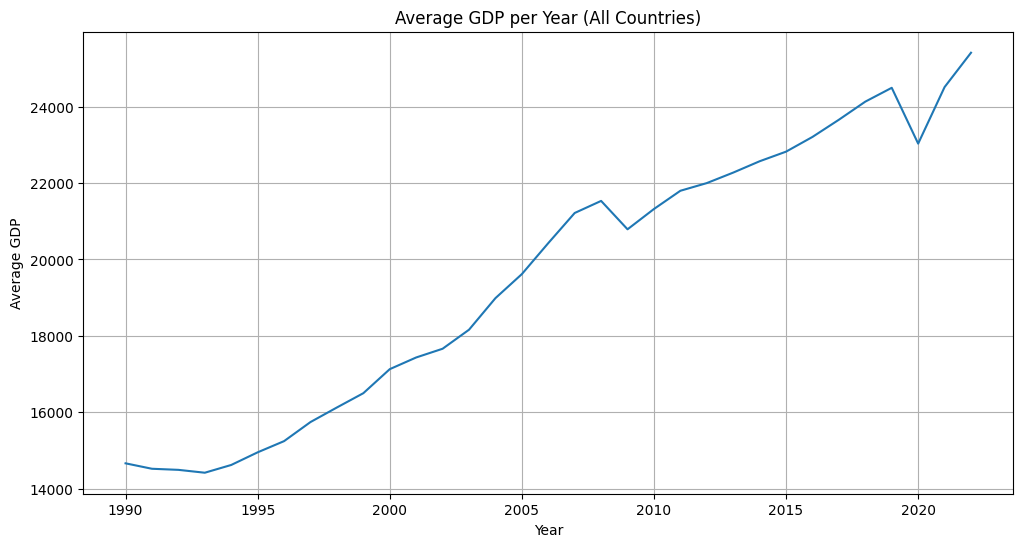

In [8]:
# Calculate the average GDP for each year
average_gdp_per_year = gdp_adm0_long.groupby('Year')['GDP'].mean().reset_index()

# Plot the average GDP per year
plt.figure(figsize=(12, 6))
sns.lineplot(data=average_gdp_per_year, x='Year', y='GDP')
plt.title('Average GDP per Year (All Countries)')
plt.xlabel('Year')
plt.ylabel('Average GDP')
plt.grid(True)
plt.show()

In [6]:
# Reshape the DataFrame to long format
gdp_adm0_long = gdp_adm0_df.melt(id_vars=['GID_nmbr', 'iso3', 'Country', 'slope'],
                                 var_name='Year',
                                 value_name='GDP')

# Convert 'Year' column to numeric
gdp_adm0_long['Year'] = pd.to_numeric(gdp_adm0_long['Year'])

display(gdp_adm0_long.head())

,GID_nmbr,iso3,Country,slope,Year,GDP
0,4,ALB,Albania,0.02382,1990,4827.0
1,54,DZA,Algeria,0.00581,1990,8829.0
2,3,AGO,Angola,0.00954,1990,5793.0
3,10,ATG,Antigua and Barbuda,0.00413,1990,17017.0
4,7,ARG,Argentina,0.00613,1990,14137.0


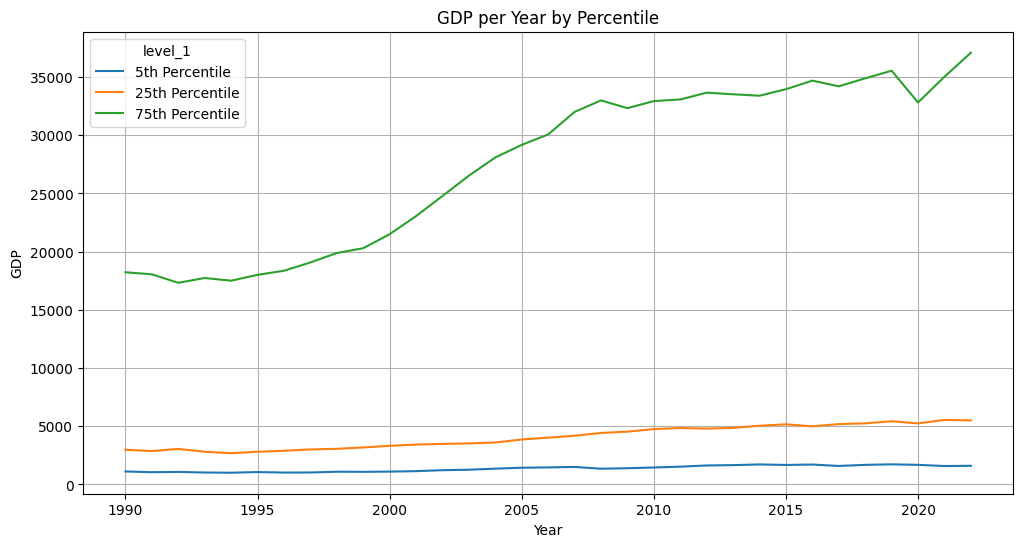

In [9]:
# Calculate the GDP for different percentiles for each year
percentile_gdp_per_year = gdp_adm0_long.groupby('Year')['GDP'].quantile([0.05, 0.25, 0.75]).reset_index()
percentile_gdp_per_year['level_1'] = percentile_gdp_per_year['level_1'].map({0.05: '5th Percentile', 0.25: '25th Percentile', 0.75: '75th Percentile'})

# Plot the GDP trends for different percentiles
plt.figure(figsize=(12, 6))
sns.lineplot(data=percentile_gdp_per_year, x='Year', y='GDP', hue='level_1')
plt.title('GDP per Year by Percentile')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.grid(True)
plt.show()

TODO: Come back and clean this up properly

This is interesting, indicating that for the 5th percentile of countries, the gdp for the country is not being changed drastically. Same for the 25th percentile.

The model that needs to be developed has to be robust to handle this bias


Things to take Note of {Generated by Gemini}

Feature Engineering:
Lagged Variables: Include the GDP from previous years as features. This can help the model capture the historical trend of each country.
Growth Rate: Calculate and include the historical growth rate of GDP for each country. This can be a strong indicator of future growth.
Country-Specific Features: If available, include other country-specific features that might influence GDP growth, such as political stability, education levels, infrastructure development, etc.
Model Selection:
Tree-Based Models: Models like Random Forests or Gradient Boosting (e.g., LightGBM, XGBoost) are often good at capturing non-linear relationships and interactions between features, which can be helpful when dealing with different growth patterns.
Time Series Models: While you have panel data (multiple countries over time), you could explore time series models that can handle multiple series, such as a panel data approach with ARIMA or a state-space model.
Mixed-Effects Models: These models can account for both fixed effects (common to all countries) and random effects (specific to each country), allowing you to model the overall trend while also capturing country-specific variations.
Handling Bias:
Stratified Sampling: When training your model, consider using stratified sampling to ensure that your training data includes a representative sample of countries from different income levels or growth rate groups.
Weighted Loss Function: You could potentially use a weighted loss function during training that gives more weight to the predictions for countries where the model is struggling (e.g., lower-income countries with less predictable growth).
Separate Models: As you initially considered, you could train separate models for different groups of countries (e.g., one model for low-growth countries and another for high-growth countries). However, this can be more complex to manage and may require defining clear criteria for grouping countries.
Ensemble Methods: Combine predictions from multiple models. You could train different models on different subsets of the data or using different algorithms and then combine their predictions to improve robustness.
Evaluation Metrics:
Beyond overall metrics like Mean Squared Error (MSE) or R-squared, evaluate your model's performance specifically on different subgroups of countries (e.g., by income level or growth rate) to ensure it's not performing poorly on certain groups.
Yes, the model needs to be robust to handle this bias. Simply training a single model on the entire dataset without considering the different growth patterns could lead to a model that performs well on average but poorly for countries that deviate significantly from the mean trend. By incorporating the strategies mentioned above, you can build a more robust model that can better predict GDP for a wider range of countries.